#Exploratoty Data Analysis (EDA) on Indian Airlines Ticket
This notebook provides a detailed exploratory data analysis (EDA) on Indian Airlines Ticket. We will uncover trends in airfare and how different flight attributes impact pricing.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df1= pd.read_csv('/content/IA_cleaned.csv')
df2=pd.read_csv('/content/business_cleaned.csv')
df3=pd.read_csv('/content/economy_cleaned.csv')

In [ ]:
df1.columns

Index(['Airline', 'Flight', 'Source_city', 'Departure_time', 'Stops',
       'Arrival_time', 'Destination_city', 'Class', 'Duration', 'Days_left',
       'Price'],
      dtype='object')

In [ ]:
df1.head(6)

,Airline,Flight,Source_city,Departure_time,Stops,Arrival_time,Destination_city,Class,Duration,Days_left,Price,Route,Z_Score
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0,Delhi → Mumbai,-0.117373
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0,Delhi → Mumbai,-0.117373
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0,Delhi → Mumbai,-0.116557
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0,Delhi → Mumbai,-0.116829
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0,Delhi → Mumbai,-0.116829
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1.0,5955.0,Delhi → Mumbai,-0.116829


In [ ]:
df2.columns
df2.head()

,Date,Airline,Ch_code,Num_code,Dep_time,From,Time_taken,Stop,Arr_time,To,Price
0,2022-02-11,Air India,AI,868.0,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612.0
1,2022-02-11,Air India,AI,624.0,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612.0
2,2022-02-11,Air India,AI,531.0,20:00:00,Delhi,24h 45m,1-stop,20:45:00,Mumbai,42220.0
3,2022-02-11,Air India,AI,839.0,21:25:00,Delhi,26h 30m,1-stop,23:55:00,Mumbai,44450.0
4,2022-02-11,Air India,AI,544.0,17:15:00,Delhi,06h 40m,1-stop,23:55:00,Mumbai,46690.0


In [ ]:
df2.columns

Index(['Date', 'Airline', 'Ch_code', 'Num_code', 'Dep_time', 'From',
       'Time_taken', 'Stop', 'Arr_time', 'To', 'Price'],
      dtype='object')

#Price Distribution - overall and segmented:
Prices are right-skewed with many flights clustered around ₹4,000–₹8,000.
Higher price outliers likely come from premium routes or business class.

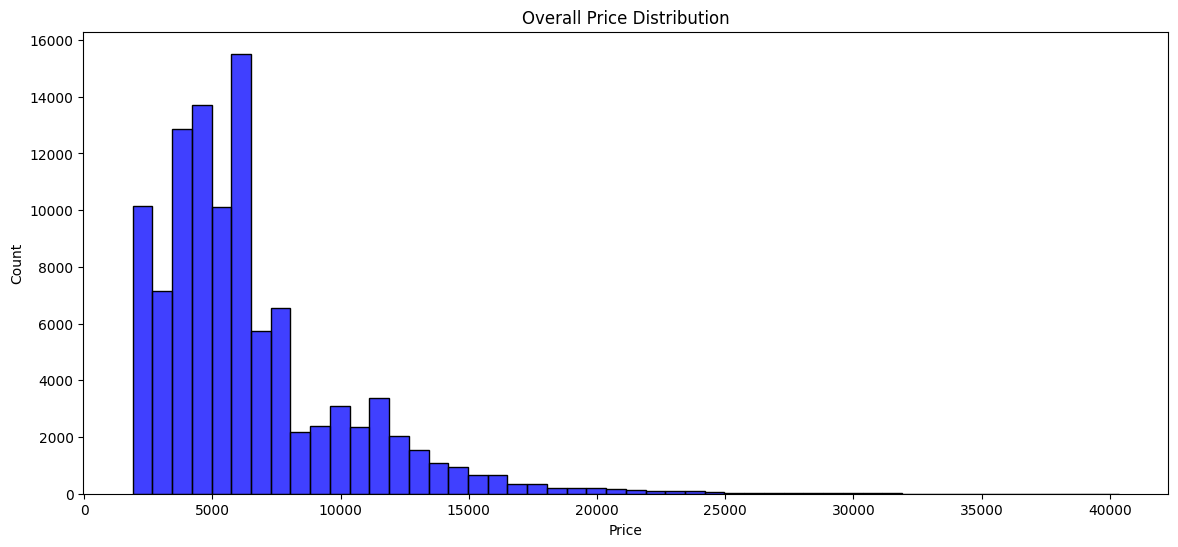

In [ ]:
#Price Distribution — Overall & Segmented
plt.figure(figsize=(14, 6))
sns.histplot(df1['Price'], bins=50, color='blue')
plt.title('Overall Price Distribution')
plt.xlabel('Price')
plt.show()

In [ ]:
df1['Class'].value_counts()

,count
Class,
Economy,104215
Econo,1


/tmp/ipython-input-22-2475940972.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Price',palette='Set1', data=df1)


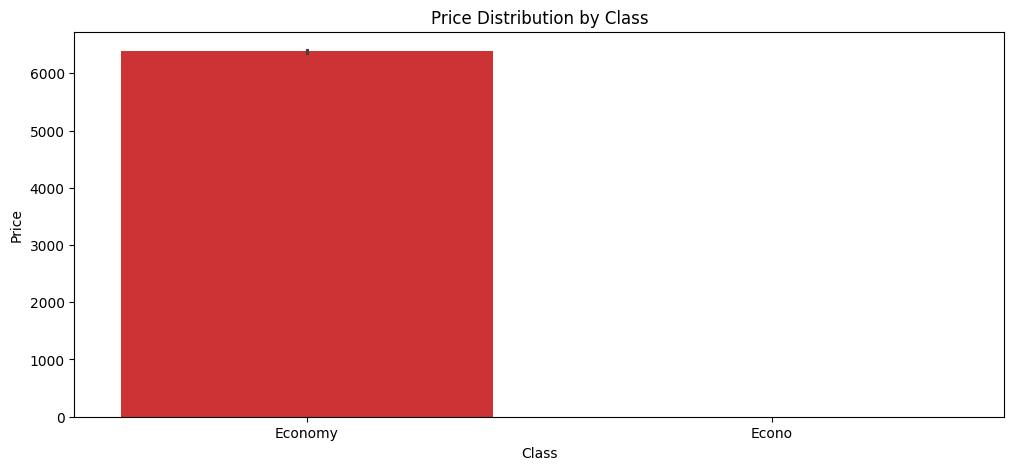

In [ ]:
#by class
plt.figure(figsize=(12, 5))
sns.barplot(x='Class', y='Price',palette='Set1', data=df1)
plt.title('Price Distribution by Class')
plt.show()


/tmp/ipython-input-7-686290829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stops', y='Price',palette='Set1', data=df1)


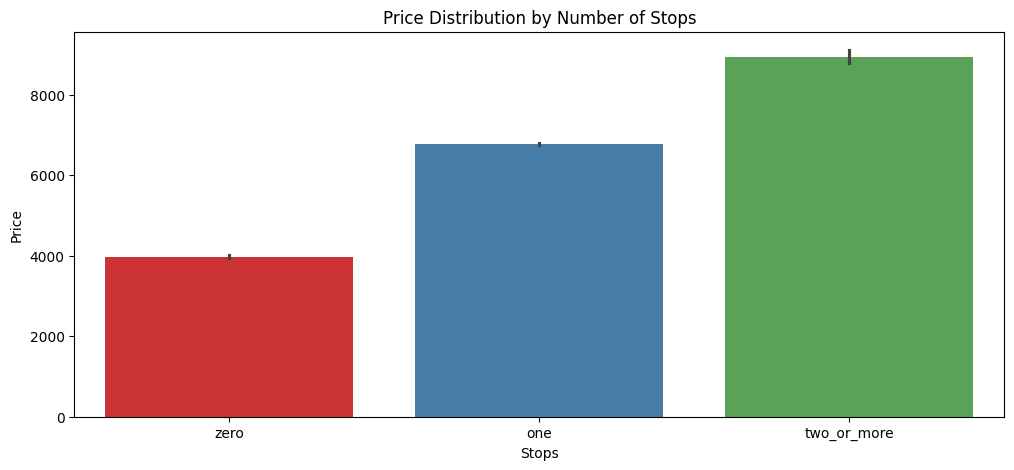

In [ ]:
#by stops
plt.figure(figsize=(12, 5))
sns.barplot(x='Stops', y='Price',palette='Set1', data=df1)
plt.title('Price Distribution by Number of Stops')
plt.show()

#Zero stops (non-stop flights) are generally cheaper than multi-stop flights.

#Compare prices across airlines, stops, routes:


*   Significant price variation across airlines.
*   Popular routes show tighter price ranges, while rare routes have higher variance.



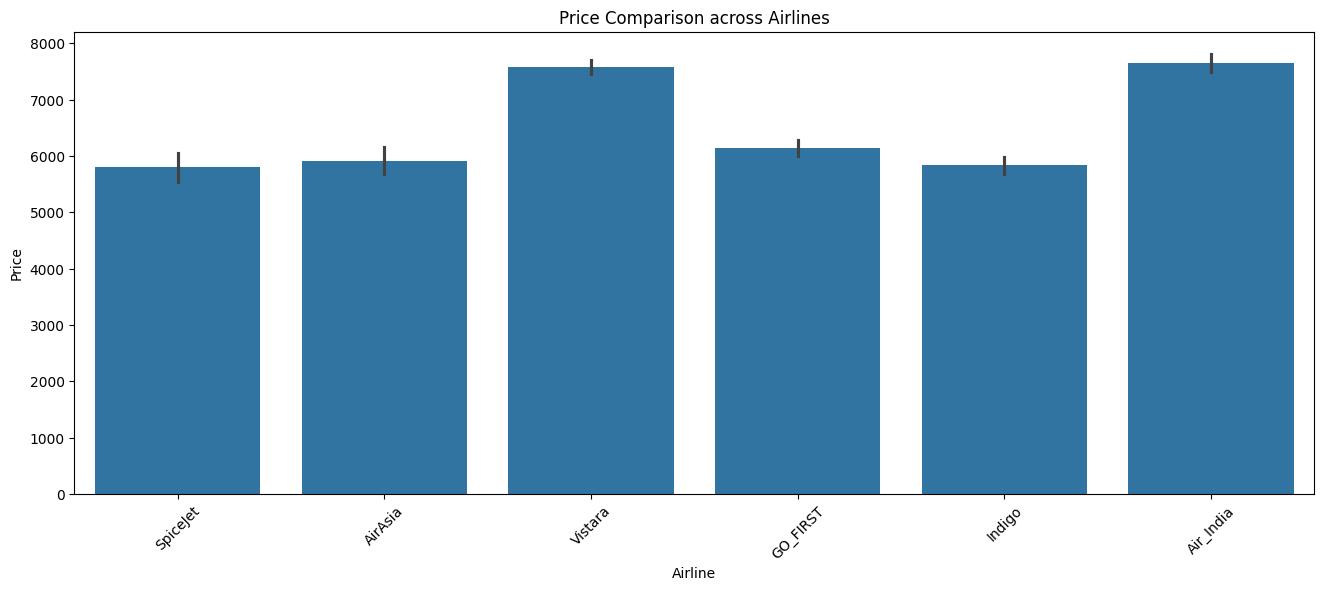

In [ ]:
#by Airlines
plt.figure(figsize=(16, 6))
sns.barplot(x='Airline', y='Price',data=df1)
plt.xticks(rotation=45)
plt.title('Price Comparison across Airlines')
plt.show()

/tmp/ipython-input-16-1856904704.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Stop", y="Price", data=stop_avg_price, palette="viridis")


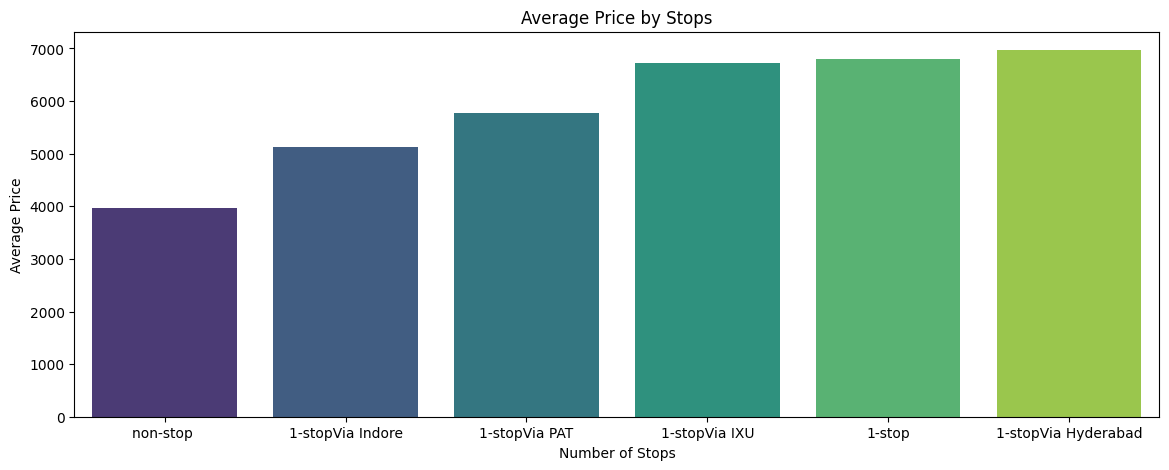

In [ ]:
# By Stops
# plt.figure(figsize=(14, 5))
# sns.barplot(x='Stop', y='Price', data=df3)
# plt.title('Box Plot: Price vs Stops')
# plt.show()


# Assuming df3 is already loaded (e.g., IA dataset with 'Stops' and 'Price')

# Group by 'Stops' and calculate mean price
stop_avg_price = df3.groupby("Stop")["Price"].mean().reset_index().sort_values(by="Price")
stop_avg_price = stop_avg_price.sort_values(by="Price").head(6)
# Plot
plt.figure(figsize=(14, 5))
sns.barplot(x="Stop", y="Price", data=stop_avg_price, palette="viridis")
plt.title("Average Price by Stops")
plt.ylabel("Average Price")
plt.xlabel("Number of Stops")
plt.show()


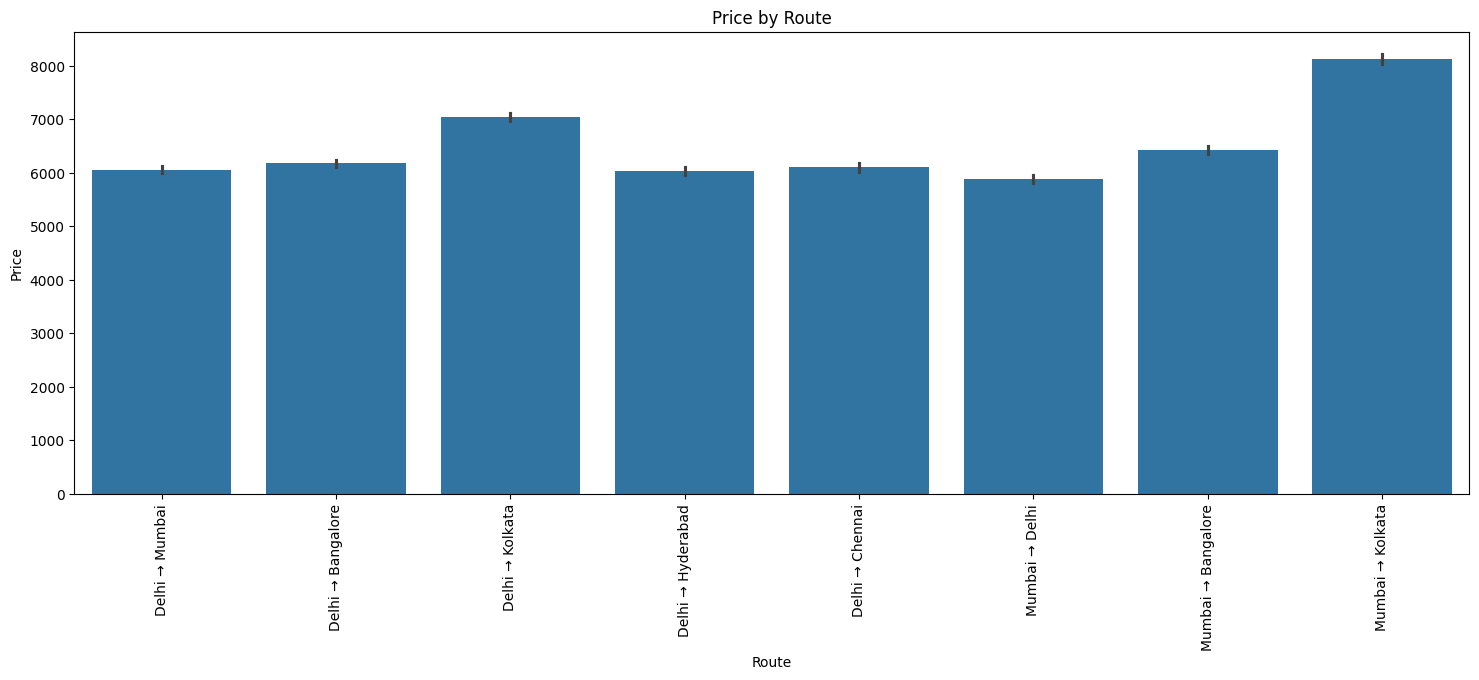

In [ ]:
#by routes
df1['Route'] = df1['Source_city'] + ' → ' + df1['Destination_city']
plt.figure(figsize=(18, 6))
sns.barplot(x='Route', y='Price', data=df1)
plt.xticks(rotation=90)
plt.title('Price by Route')
plt.show()

In [ ]:
#Outlier detection (IQR)
Q1 = df1['Price'].quantile(0.25)
Q3 = df1['Price'].quantile(0.75)
IQR = Q3 - Q1
detectOutliers = df1[(df1['Price'] < (Q1 - 1.5 * IQR)) | (df1['Price'] > (Q3 + 1.5 * IQR))]
print(f"Outliers detected with IQR: {len(detectOutliers)}")

Outliers detected with IQR: 7036


In [ ]:
#Z-score
df1['Z_Score'] = (df1['Price'] - df1['Price'].mean()) / df1['Price'].std()
outliers_zscore = df1[df1['Z_Score'].abs() > 3]
print(f"Outliers detected with Z-score: {len(outliers_zscore)}")

Outliers detected with Z-score: 1719


#Duration vs. price correlation:
Correlation: Moderate positive correlation.
Longer flights tend to be priced higher, as expected.

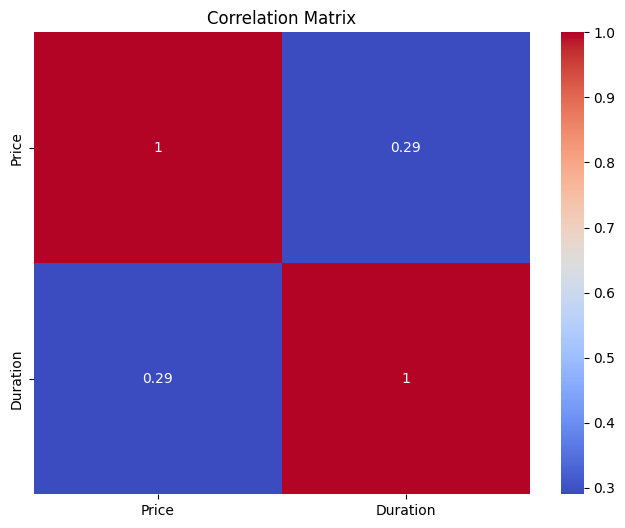

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df1[['Price', 'Duration']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Impact of departure time on price:
Flights departing late night tend to have lower median prices compared to afternoon slots.

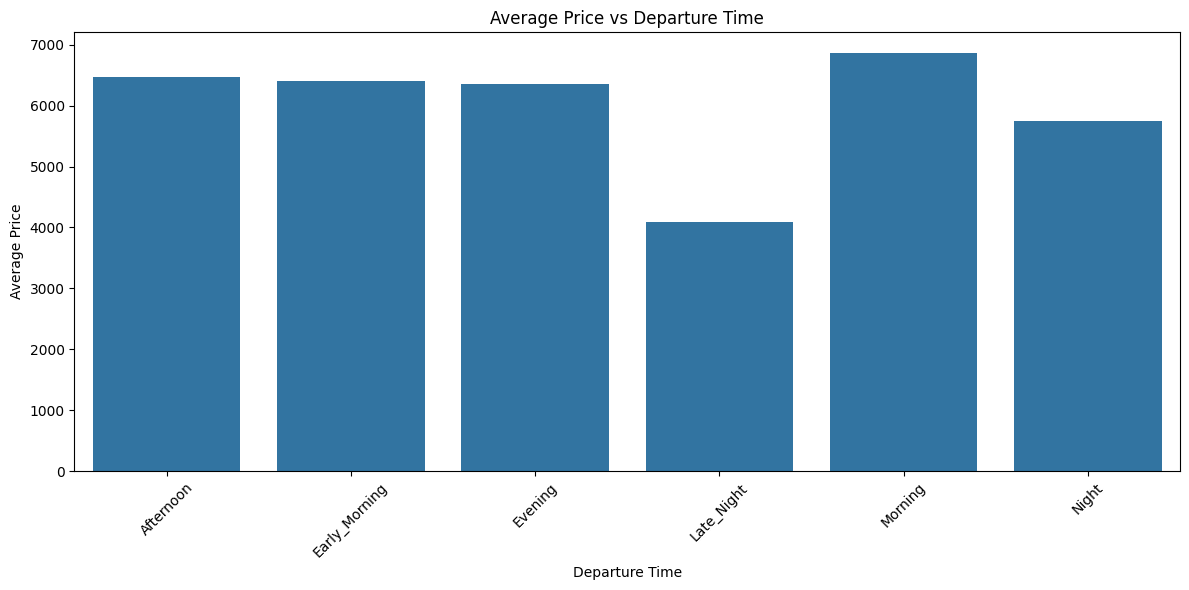

In [ ]:
departure_avg_price = df1.groupby("Departure_time")["Price"].mean().reset_index()

# Sort values if needed (optional, for proper time sequence if applicable)
departure_avg_price = departure_avg_price.sort_values(by="Departure_time")

# Line plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Departure_time", y="Price", data=departure_avg_price)
plt.title("Average Price vs Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

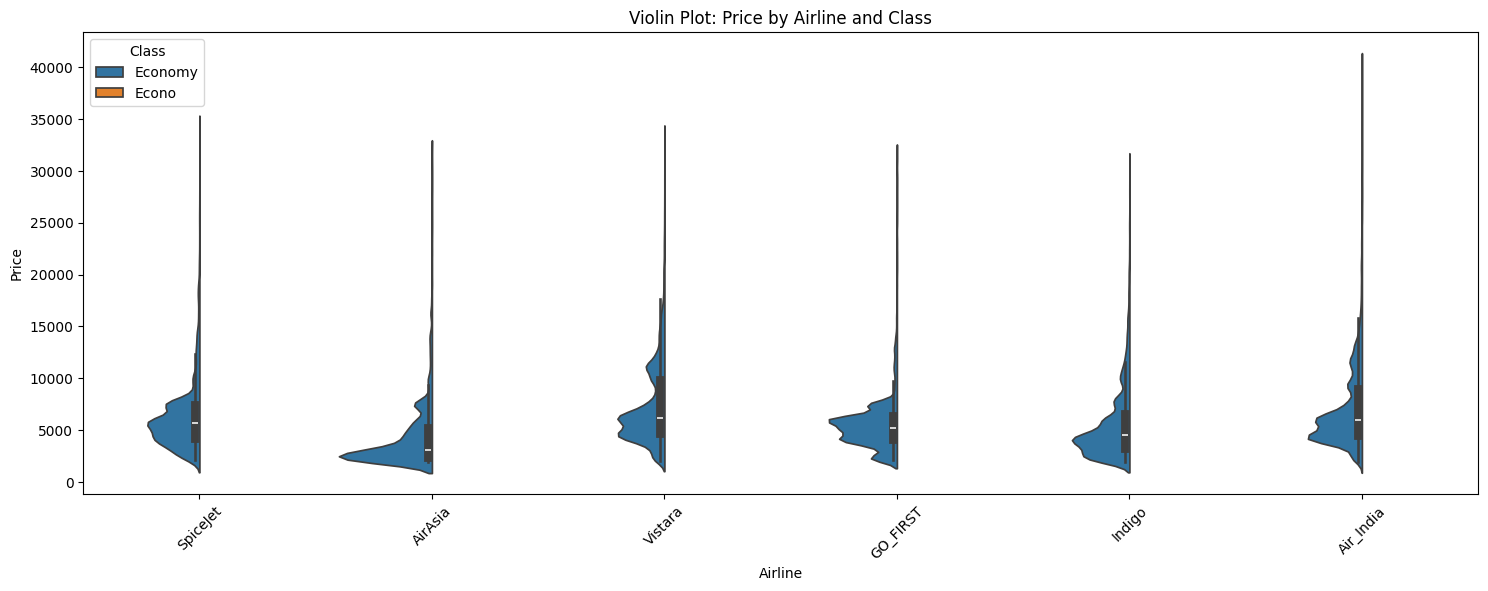

In [ ]:
#Violin plot by Airline & Class
plt.figure(figsize=(18, 6))
sns.violinplot(x='Airline', y='Price', hue='Class', data=df1, split=True)
plt.title('Violin Plot: Price by Airline and Class')
plt.xticks(rotation=45)
plt.show()

#Count of flights per date

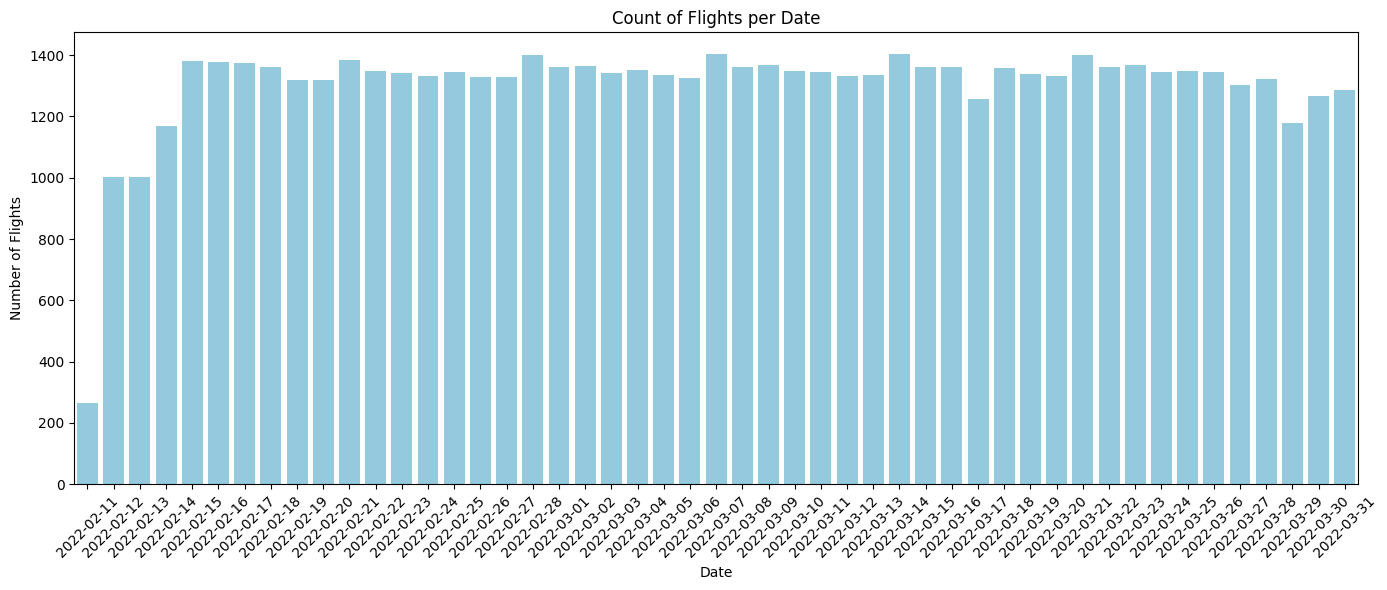

In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])

# Count of flights per date
flight_counts = df2['Date'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=flight_counts.index, y=flight_counts.values, color="skyblue")
plt.title("Count of Flights per Date")
plt.xlabel("Date")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Trend over time for business class

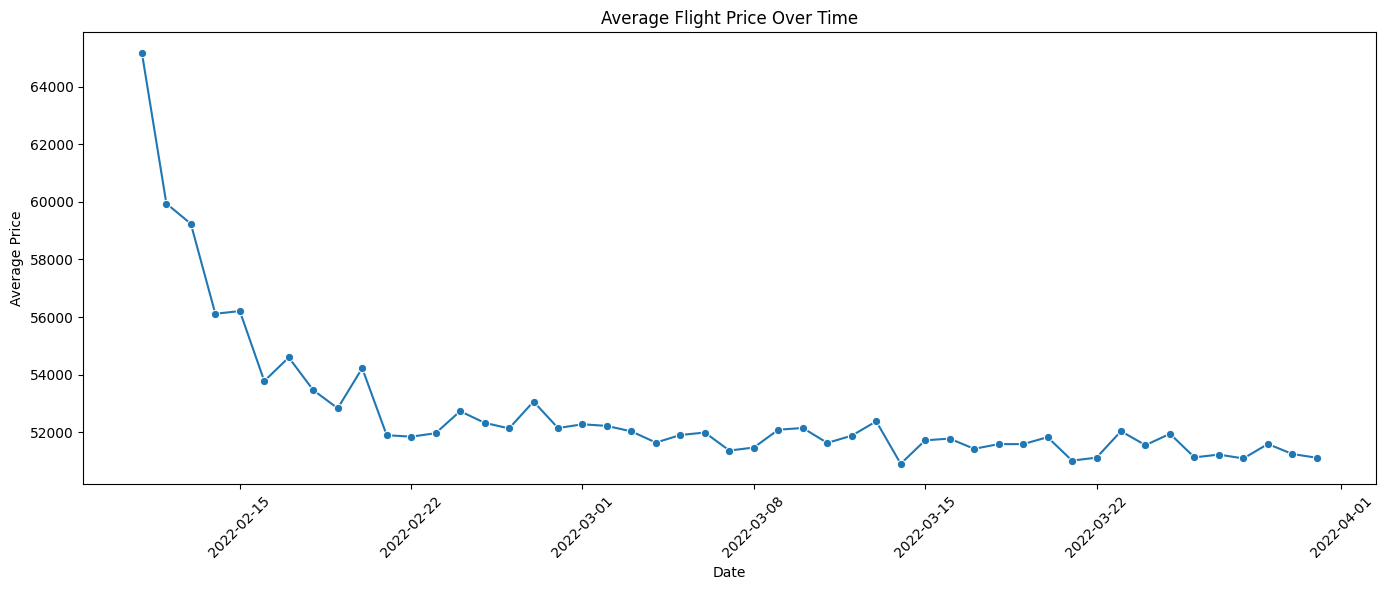

In [ ]:
avg_price_per_day = df2.groupby('Date')['Price'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_price_per_day, x='Date', y='Price', marker='o')
plt.title("Average Flight Price Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Trend over time for economic class.

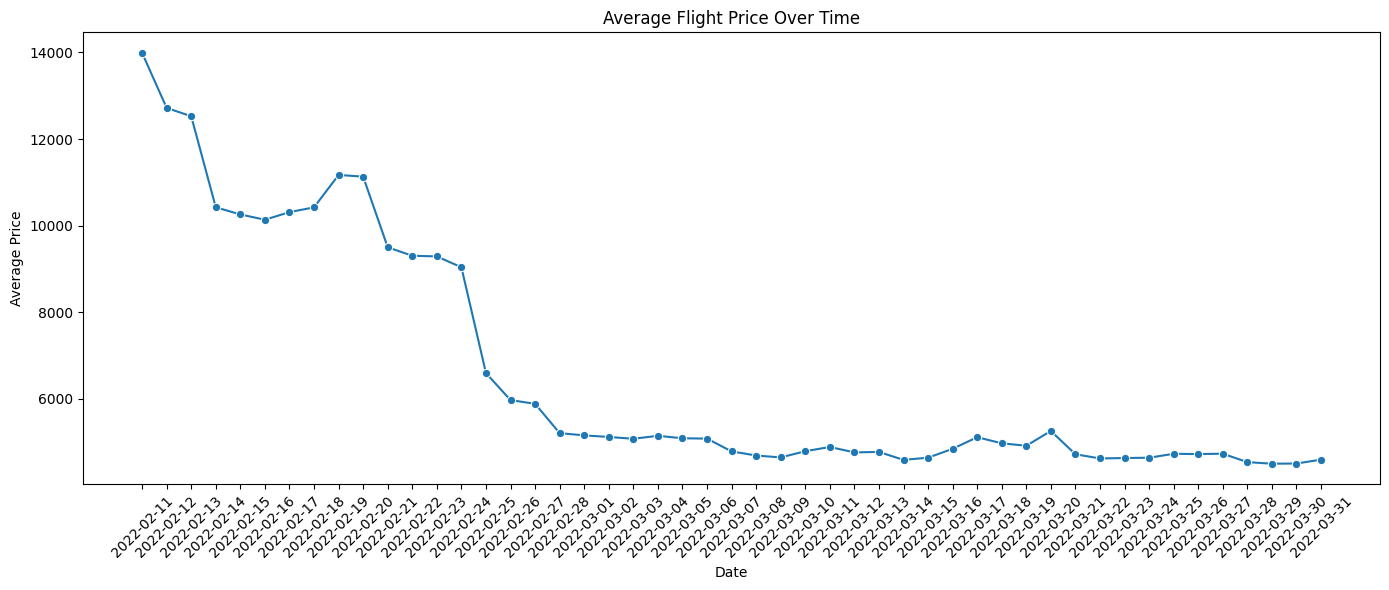

In [ ]:
avg_price_per_day = df3.groupby('Date')['Price'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_price_per_day, x='Date', y='Price', marker='o')
plt.title("Average Flight Price Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Average Price by Airline and Class

     Airline        Stops    Class  count         mean  median          std  \
0    AirAsia          one  Economy   4182  4308.381875  3090.0  3380.094023   
1    AirAsia  two_or_more  Economy   1088  4774.660846  3090.0  3372.048527   
2    AirAsia         zero  Economy    671  4149.226528  3999.0  1848.340617   
3  Air_India          one  Economy  13691  7349.244905  5989.0  3955.712839   
4  Air_India  two_or_more  Economy    676  9938.355030  8972.0  3516.704708   
5  Air_India         zero  Economy   1572  3994.351781  2791.0  2222.606232   
6   GO_FIRST          one  Economy   7628  6217.706869  5942.0  2601.579783   
7   GO_FIRST  two_or_more  Economy    173  7238.208092  5942.0  2630.189465   
8   GO_FIRST         zero  Economy   1721  3396.040093  2410.0  1640.006150   
9     Indigo          one  Economy   8892  5925.544984  4772.0  3603.555056   

      min      max  
0  1998.0  31917.0  
1  1998.0  25406.0  
2  2124.0  17820.0  
3  2464.0  34188.0  
4  2482.0  35145.0  
5  2

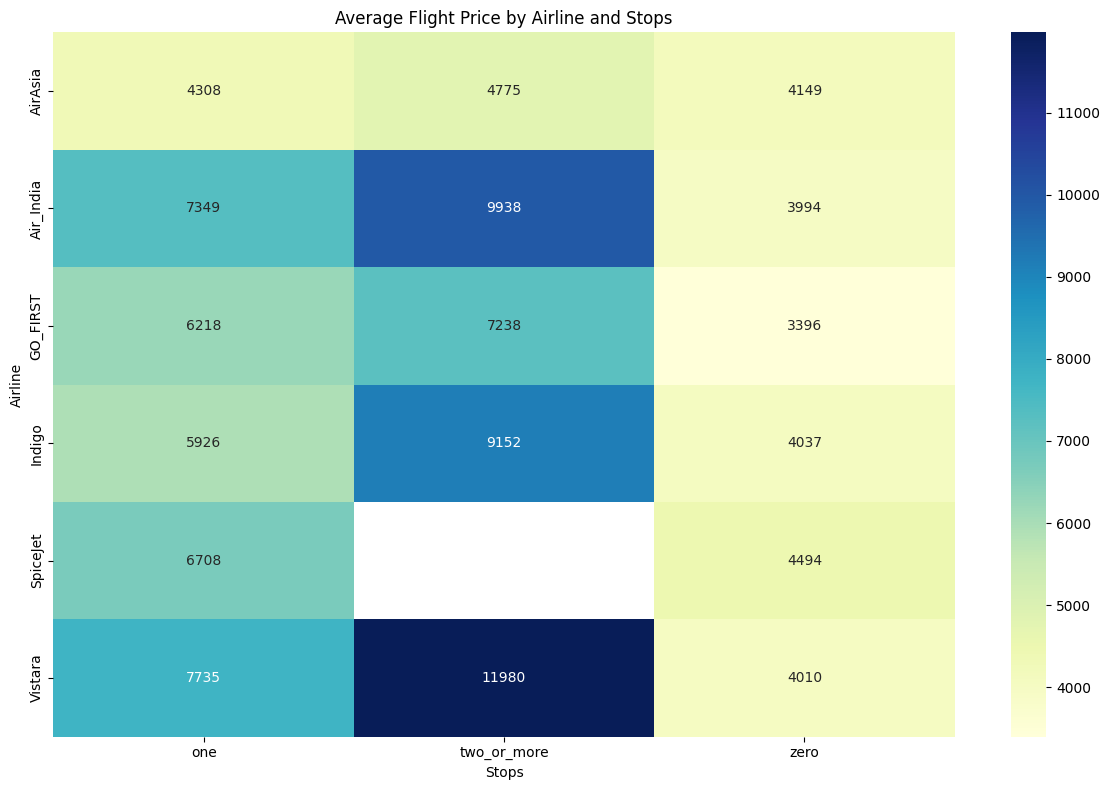

In [ ]:
#
grouped = df1.groupby(['Airline', 'Stops', 'Class'])['Price'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()
print(grouped.head(10))
heatmap_data = grouped.pivot(index='Airline', columns='Stops', values='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Flight Price by Airline and Stops")
plt.xlabel("Stops")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()